In [1]:
from skimage import color, transform, restoration, io, feature, filters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
realistic_test = io.imread('../data/realistic/characters_by_adnate_-_melbourne_(australia)1329.jpg')

(725, 600, 3)


Array([[[189, 134,  44],
        [189, 136,  44],
        [184, 138,  42],
        ...,
        [165,  59,  45],
        [166,  51,  46],
        [175,  49,  53]],

       [[189, 129,  41],
        [188, 131,  42],
        [185, 135,  40],
        ...,
        [167,  63,  50],
        [168,  55,  51],
        [176,  51,  55]],

       [[196, 128,  47],
        [195, 130,  46],
        [191, 134,  45],
        ...,
        [171,  69,  55],
        [170,  58,  54],
        [172,  52,  54]],

       ...,

       [[ 33,  60,  55],
        [  9,  31,  28],
        [  7,  22,  19],
        ...,
        [143,  43,  20],
        [128,  53,  24],
        [128,  57,  29]],

       [[ 50,  82,  81],
        [ 29,  55,  54],
        [ 13,  32,  30],
        ...,
        [151,  38,  24],
        [134,  46,  26],
        [123,  53,  28]],

       [[ 61,  91,  99],
        [ 45,  73,  77],
        [ 19,  40,  41],
        ...,
        [159,  32,  23],
        [141,  41,  25],
        [117,  51,  25]]

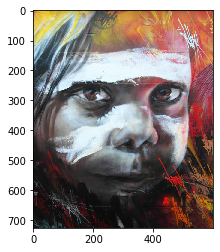

In [23]:
print(realistic_test.shape)
plt.imshow(realistic_test)

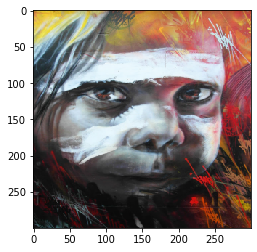

In [15]:
realistic_resized = transform.resize(realistic_test, (300,300))
plt.imshow(realistic_resized)

# The Dominant Colors

In [16]:
nrow, ncol, depth = realistic_resized.shape 
lst_of_pixels = [realistic_resized[irow][icol] for irow in range(nrow) for icol in range(ncol)]

kmeans_realistic = KMeans(n_clusters=3).fit(lst_of_pixels)  # looking for the 3 dominant colors
realistic_cluster_centers = kmeans_realistic.cluster_centers_ 
# colors_reshape = colors.reshape(1,3,3)

kmeans_realistic_color_mapped = np.array(list(map(lambda x: realistic_cluster_centers[x], kmeans_realistic.labels_))).reshape(300, 300, 3)


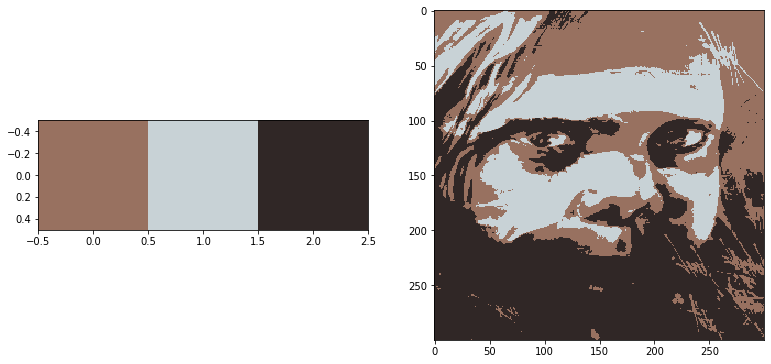

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(13, 13))
axs[0].imshow(realistic_cluster_centers.reshape(1, 3, 3))
axs[1].imshow(kmeans_realistic_color_mapped)